## Script 1| Regression Model Development

DAT-5303 | Machine Learning
Zeyad Elgendy

## Purpose of this Script

The script is designed for critical coding skills which are analytical on Python. It explains the apprentice chef dataset. This script will contain a base model , which will be developed in different methods of regression.

In [2]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


chef_data = pd.read_excel('Apprentice_Chef_Dataset.xlsx')
 
print(chef_data)


# outputting the first ten rows of the dataset
chef_data.head(n = 50)

      REVENUE  CROSS_SELL_SUCCESS               NAME                        EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0       393.0                   1            Saathos     saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0              

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


## Initial Exploration of the Dataset

a) Finding observations (rows) are present in the dataset? How many features (columns)?

By using the code to complete the formatted (an f-string) to print the number of observations and the number of features

In [45]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef_data.shape[0]}
Features:     {chef_data.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



b) Printing the name of each column. finding out the column names that are confusing with any features and finding out the domain knowledge which is needed


In [46]:
# looping to print column names one by one
for column in chef_data:
    print(column)

REVENUE
CROSS_SELL_SUCCESS
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
MOBILE_NUMBER
CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON
TASTES_AND_PREFERENCES
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
EARLY_DELIVERIES
LATE_DELIVERIES
PACKAGE_LOCKER
REFRIGERATED_LOCKER
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
MASTER_CLASSES_ATTENDED
MEDIAN_MEAL_RATING
AVG_CLICKS_PER_VISIT
TOTAL_PHOTOS_VIEWED


c) Displaying the last 10 rows in the chef data without using a wrapper

In [47]:
# displaying the LAST 5 rows of the DataFrame
chef_data.tail(n = 15)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
1931,3838.50,0,Rudge,rudge@travelers.com,Rudge,Rudge,203,10,8,10,90.00,1,4,1,0,4,1,33,0,2,0,0,261.0,9,1,3,15,0
1932,3375.00,0,Rafford,rafford@msn.com,Rafford,Rafford,275,3,4,4,131.27,1,4,1,0,6,2,0,4,0,1,0,287.2,9,1,3,12,424
1933,1900.00,1,Buford Bulwer,buford.bulwer@gmail.com,Buford,Bulwer,42,8,7,10,184.90,1,3,0,1,5,1,0,0,1,1,0,262.0,10,1,3,12,1
1934,765.00,1,Mallador Locke,mallador.locke@live.com,Mallador,Locke,13,4,11,2,90.45,0,5,1,1,6,2,3,0,3,1,1,225.6,10,0,1,16,0
1935,1035.00,1,Luthor Tyrell (son of Moryn),luthor.tyrell.(son.of.moryn)@microsoft.com,Luthor,Tyrell,12,3,11,3,104.07,1,2,0,0,6,1,0,3,3,1,1,194.4,10,0,3,13,0
1936,2700.25,1,Meryn Trant,meryn.trant@ge.org,Meryn,Trant,71,1,6,2,57.00,1,1,0,1,6,2,14,4,8,1,1,227.4,10,0,3,13,361
1937,1429.00,1,Tumberjon,tumberjon@protonmail.com,Tumberjon,Tumberjon,67,6,5,5,70.18,1,2,1,1,6,1,8,3,0,0,0,224.0,10,0,3,13,0
1938,2000.00,1,Varamyr,varamyr@ge.org,Varamyr,Varamyr,61,8,6,4,124.43,1,1,0,1,5,1,12,0,2,1,1,263.4,10,0,5,8,368
1939,5380.00,1,Wun Weg Wun Dar Wun,wun.weg.wun.dar.wun@gmail.com,Wun,Weg Wun Dar Wun,115,8,8,1,531.04,1,0,0,1,6,1,12,3,0,1,0,327.9,10,1,4,9,603
1940,1970.00,0,Dolf,dolf@travelers.com,Dolf,Dolf,99,3,7,5,155.63,1,1,0,0,6,2,2,0,1,0,0,308.2,10,2,3,14,0


d) showing different information about each variable and including the missing variable

In [48]:
# INFOrmation about each variable
chef_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

The dataset contains mix type of variables. Let's analyze the dataset by which developing a model that results in analyzing the how much the chef data generates a profit or sales ( REVENUE ). Notice the summary of data types at the bottom of the output.

## Analayzing the change in Revenue

The Y-variable will be our ( REVENUE ) is put in the data as float which contain decimal places. That is very common in the meal prices. In statistics we must care about different modeling till we reach the beast result. As a result,we will see how the expected REVENUE of the chef data can result in different and understand the flow of the data

In addition, keep in mind the y-variable is often referred to as a response variable or a dependent variable. Think of this in terms of the following:

    Question: How much is the revenue in the apprentice chef data?
    Response: well and that how it depends on the features of each meal .


e) Develop a histogram to analyze the distribution of the Y-variable.

how does looks like positively skewed or negatively skewed and in a histplot

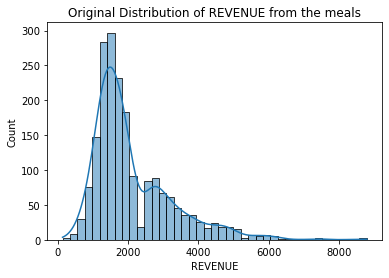

In [49]:
# developing a histogram using HISTPLOT
sns.histplot(data   = chef_data,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of REVENUE from the meals")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

As it can be observed the Revenue prices are positively skewed I will transform later for now let's continue with the data analysis.

In the previous step, I confirmed that REVENUE is continuous. Thus, we can approach our predictive modeling challenge with a linear model. In addition, linear models depends on x-variables which are continous. As a result, let's use descriptive statistics to identify X-variables that meet this assumption.

  a) DESCRIBE each quantitative column using descriptive statistics. Round to two decimal places.

In [50]:
# descriptive statistics for numeric data
chef_data.describe(include = 'number').round(2)

# alternative code
# housing.describe(include = [int, float]).round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


a) Using the method chaining method to show the number of missing values.

Write a code to show the number of missing values in the dataset.

In [51]:
# taking the housing dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
chef_data.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [52]:
# Dropping the missing values.
new_chefdata = chef_data.drop(["NAME","EMAIL","FIRST_NAME","FAMILY_NAME"],axis=1)

In [53]:
## DISPLAY DATA INFO ##
new_chefdata.info(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 3   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 4   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 5   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 6   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 7   MOBILE_NUMBER                1946 non-null   int64  
 8   CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 9   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 10  TASTES_AND_PREFERENCES       1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

# Linear Modeling

Testing different models inorder to find which are the best models which best suits the case

Part 1 : Ordinary Least Squares Regression

Determining x side x-train and y-side y_train. Then i can build different models let's test our best model

In [59]:
# declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED' , 'CONTACTS_W_CUSTOMER_SERVICE' ,
               'PRODUCT_CATEGORIES_VIEWED' , 'CANCELLATIONS_BEFORE_NOON' ,
               'CANCELLATIONS_AFTER_NOON' , 'WEEKLY_PLAN' , 'EARLY_DELIVERIES' ,
               'CROSS_SELL_SUCCESS' , 'UNIQUE_MEALS_PURCH' ,'TASTES_AND_PREFERENCES',
               'AVG_PREP_VID_TIME','MEDIAN_MEAL_RATING']

a) Model Development in scikit-learn - Step 1

Apply the above regression model in scikit-learn:

    1. Set ols_data to the x_variables list (using new_chefdata.loc)
    2. Set housing_target to Sale_Price (using new_chefdata.loc)
    3. Run train_test_split with a test_size of 0.25 and a random_state of 219.


In [60]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
x_data = new_chefdata.loc[ : , x_variables]


# Preparing the target variable
y_data = new_chefdata.loc[ : , 'REVENUE']


#################################
## setting up train-test split ##
#################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [61]:
# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6054
Testing Score  : 0.6322
Train-Test Gap : 0.0268


## Extracting co-efficients

In [62]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', -760.05)
('TOTAL_MEALS_ORDERED', 6.49)
('CONTACTS_W_CUSTOMER_SERVICE', 47.44)
('PRODUCT_CATEGORIES_VIEWED', 9.12)
('CANCELLATIONS_BEFORE_NOON', 6.73)
('CANCELLATIONS_AFTER_NOON', -32.82)
('WEEKLY_PLAN', 0.32)
('EARLY_DELIVERIES', 0.11)
('CROSS_SELL_SUCCESS', -83.14)
('UNIQUE_MEALS_PURCH', -73.34)
('TASTES_AND_PREFERENCES', 40.61)
('AVG_PREP_VID_TIME', 7.91)
('MEDIAN_MEAL_RATING', 422.29)


## Storing Results

In [63]:
# dynamically printing results
ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ols_model)

Model Name:     Linear Regression
Train_Score:    0.6054
Test_Score:     0.6322
Train-Test Gap: 0.0268

Coefficents
-----------
                        Feature  Coefficient
0                     intercept      -760.05
1           TOTAL_MEALS_ORDERED         6.49
2   CONTACTS_W_CUSTOMER_SERVICE        47.44
3     PRODUCT_CATEGORIES_VIEWED         9.12
4     CANCELLATIONS_BEFORE_NOON         6.73
5      CANCELLATIONS_AFTER_NOON       -32.82
6                   WEEKLY_PLAN         0.32
7              EARLY_DELIVERIES         0.11
8            CROSS_SELL_SUCCESS       -83.14
9            UNIQUE_MEALS_PURCH       -73.34
10       TASTES_AND_PREFERENCES        40.61
11            AVG_PREP_VID_TIME         7.91
12           MEDIAN_MEAL_RATING       422.29


## Lasso Regression Model

Developing a lasso regression model 

In [64]:
# Setting a model name
model_name = "Lasso Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6054
Testing Score  : 0.6321
Train-Test Gap : 0.0267


In [65]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', -754.92)
('TOTAL_MEALS_ORDERED', 6.5)
('CONTACTS_W_CUSTOMER_SERVICE', 47.2)
('PRODUCT_CATEGORIES_VIEWED', 9.06)
('CANCELLATIONS_BEFORE_NOON', 6.02)
('CANCELLATIONS_AFTER_NOON', -27.78)
('WEEKLY_PLAN', 0.32)
('EARLY_DELIVERIES', 0.0)
('CROSS_SELL_SUCCESS', -77.46)
('UNIQUE_MEALS_PURCH', -73.13)
('TASTES_AND_PREFERENCES', 35.6)
('AVG_PREP_VID_TIME', 7.93)
('MEDIAN_MEAL_RATING', 419.78)


In [66]:
# dynamically printing results
lasso_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(lasso_model)

Model Name:     Lasso Regression
Train_Score:    0.6054
Test_Score:     0.6321
Train-Test Gap: 0.0267

Coefficents
-----------
                        Feature  Coefficient
0                     intercept      -754.92
1           TOTAL_MEALS_ORDERED         6.50
2   CONTACTS_W_CUSTOMER_SERVICE        47.20
3     PRODUCT_CATEGORIES_VIEWED         9.06
4     CANCELLATIONS_BEFORE_NOON         6.02
5      CANCELLATIONS_AFTER_NOON       -27.78
6                   WEEKLY_PLAN         0.32
7              EARLY_DELIVERIES         0.00
8            CROSS_SELL_SUCCESS       -77.46
9            UNIQUE_MEALS_PURCH       -73.13
10       TASTES_AND_PREFERENCES        35.60
11            AVG_PREP_VID_TIME         7.93
12           MEDIAN_MEAL_RATING       419.78


## b) Develop an ARD model.

Developing an ARD model by which reaching for different results

In [67]:
# Setting a model name
model_name = "ARD Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6046
Testing Score  : 0.6311
Train-Test Gap : 0.0265


In [68]:
# dynamically printing results
ard_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ard_model)

Model Name:     ARD Regression
Train_Score:    0.6046
Test_Score:     0.6311
Train-Test Gap: 0.0265

Coefficents
-----------
                        Feature  Coefficient
0                     intercept      -754.92
1           TOTAL_MEALS_ORDERED         6.50
2   CONTACTS_W_CUSTOMER_SERVICE        47.20
3     PRODUCT_CATEGORIES_VIEWED         9.06
4     CANCELLATIONS_BEFORE_NOON         6.02
5      CANCELLATIONS_AFTER_NOON       -27.78
6                   WEEKLY_PLAN         0.32
7              EARLY_DELIVERIES         0.00
8            CROSS_SELL_SUCCESS       -77.46
9            UNIQUE_MEALS_PURCH       -73.13
10       TASTES_AND_PREFERENCES        35.60
11            AVG_PREP_VID_TIME         7.93
12           MEDIAN_MEAL_RATING       419.78


# K nearest Neighbors and standarization

Part 1: Building our Model

we will move into distance based modelling with k-Neares Neighbours. Like OLS Regression
KNN is used in base Modelling

- it is easy to understand how predictions are made
- it works in both regression and classification settings 

a)
    Import the following packages:
       - pandas (as pd)
       - matplotlib.pyplot (as plt)
       - seaborn (as sns)
       - numpy (as np)
       - train_test_split (from sklearn.model_selection)

    Load the 'Apprentice_chef_dataset.xlsx' dataset into Python as chef_data .
 


In [72]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import numpy as np # mathematical essentials
from sklearn.model_selection import train_test_split # train/test split


# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


b) Fill in the blanks to prepare the explanatory variables and the response variable for model building.

In [74]:
# log transforming REVENUE and saving it to the dataset
new_chefdata['log_REVENUE'] = np.log(new_chefdata['REVENUE'])

In [76]:
# log transforming Lot_Area and saving it to the dataset
new_chefdata['log_TASTES_AND_PREFERENCES'] = np.log(new_chefdata['TASTES_AND_PREFERENCES'])

/Users/b/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [102]:
# preparing explanatory variable data
chef_data   = new_chefdata.drop(['REVENUE',
                               'log_REVENUE',
                               'TOTAL_MEALS_ORDERED',
                               'log_TASTES_AND_PREFERENCES'],
                                axis = 1)


# preparing the target variable
chef_target = new_chefdata.loc[ : , 'REVENUE']

## Part II: Distance Standardization

Understanding KNN features and setting a standarized scalar between each variable by which understanding how each variable works better on its own and how much the distance between each of them

   - Instantiate
   - Fit
   - Transform
   - Convert


In [103]:
# making a StandardScaler() object
scaler = StandardScaler()


# fitting the scaler with the data
scaler.fit(chef_data)


# changing our data after fit
x_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59
25%,-1.45,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59
50%,0.69,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59
75%,0.69,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37
max,0.69,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25


Notice that we've lost the column labels. Let's add them back and analyze the variance before and after scaling

In [104]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
CROSS_SELL_SUCCESS                 0.218020
UNIQUE_MEALS_PURCH                 6.257663
CONTACTS_W_CUSTOMER_SERVICE        5.201168
PRODUCT_CATEGORIES_VIEWED          9.261178
AVG_TIME_PER_SITE_VISIT         3884.497383
MOBILE_NUMBER                      0.107344
CANCELLATIONS_BEFORE_NOON          2.400263
CANCELLATIONS_AFTER_NOON           0.186736
TASTES_AND_PREFERENCES             0.204082
PC_LOGINS                          0.337105
MOBILE_LOGINS                      0.278218
WEEKLY_PLAN                      184.139876
EARLY_DELIVERIES                   5.373137
LATE_DELIVERIES                    7.528947
PACKAGE_LOCKER                     0.229000
REFRIGERATED_LOCKER                0.100272
AVG_PREP_VID_TIME               2443.767133
LARGEST_ORDER_SIZE                 2.400232
MASTER_CLASSES_ATTENDED            0.411780
MEDIAN_MEAL_RATING                 0.572040
AVG_CLICKS_PER_VISIT               5.444177
TOTAL_PHOTOS_VIEWED          

Pre- and Post-Standardization Correlation Analysis
Let's what is happening what to the correlation after standardizing the dataset. In order to best see the results, we will limit our analysis to a smaller set of variables.


<AxesSubplot:>

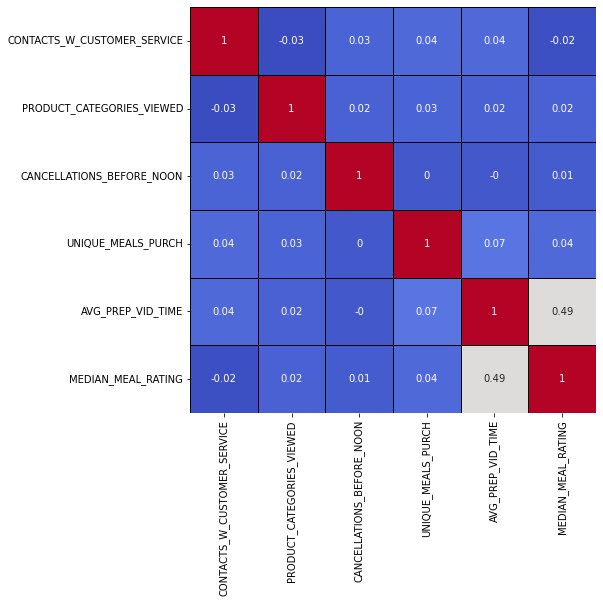

In [105]:

# Unscaled Dataset


# subsetting the original dataset
chef_subset = chef_data.loc[ : , ['CONTACTS_W_CUSTOMER_SERVICE' ,
                                     'PRODUCT_CATEGORIES_VIEWED' ,
                                     'CANCELLATIONS_BEFORE_NOON' ,
                                     'UNIQUE_MEALS_PURCH',
                                     'AVG_PREP_VID_TIME',
                                     'MEDIAN_MEAL_RATING']]


# UNSCALED correlation matrix
df_corr = chef_subset.corr().round(2)


# setting figure size and plot window
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(1, 2, 1)


# heatmap of UNSCALED correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black', 
            linewidths = 0.5)



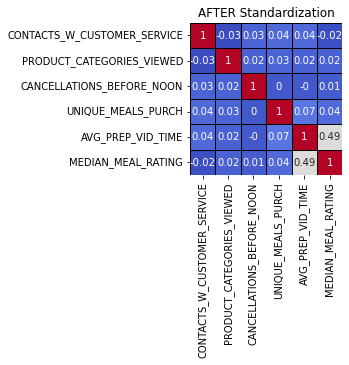

In [110]:
# Scaled Dataset
##############################################################################

# SCALED correlation matrix
df_scaled_corr = x_scaled_df.loc[ : , ['CONTACTS_W_CUSTOMER_SERVICE' ,
                                     'PRODUCT_CATEGORIES_VIEWED' ,
                                     'CANCELLATIONS_BEFORE_NOON' ,
                                     'UNIQUE_MEALS_PURCH',
                                     'AVG_PREP_VID_TIME',
                                     'MEDIAN_MEAL_RATING']].corr().round(2)


# titling the plot
plt.title("BEFORE Standardization")


# setting plot window
plt.subplot(1, 2, 2)


# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black',
            linewidths = 0.5)


# titling the plot
plt.title("AFTER Standardization")
plt.show()

Notice how correlations are still connected to each other and applying different strengths on our linear regression model on its relationships however this standardization can have effects upon distance based algorithms

## Part III: k-Nearest Neighbors with Non-Standardized Data

a) Developing training and testing sets using the non standarized dataset

In [111]:
# this is the code
x_train, x_test, y_train, y_test = train_test_split(
            housing_data,
            housing_target,
            test_size = 0.25,
            random_state = 219)

KNN with non-standardized data

b) Developing k-Nearest Neighbors model.

In [112]:
# making a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# fitting to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# predicting on new data
knn_reg_pred = knn_fit.predict(x_test)


# scoring the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.2333
KNN Train-Test Gap: 0.7667


How many neighbors?

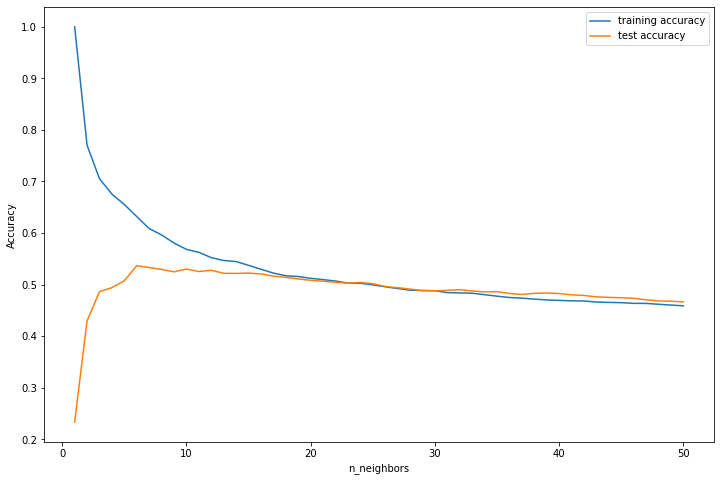

In [113]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

saving the Ideal number of neighbors based on test accuracy.

In [114]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 6


In [115]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.6319
KNN Testing Score : 0.5368
KNN Train-Test Gap: 0.0951


##  k-Nearest Neighbors with Standardized Data

In [116]:
# the code we were using before
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            housing_target,
            test_size = 0.25,
            random_state = 219)

Finding the optimal number of neighbors.

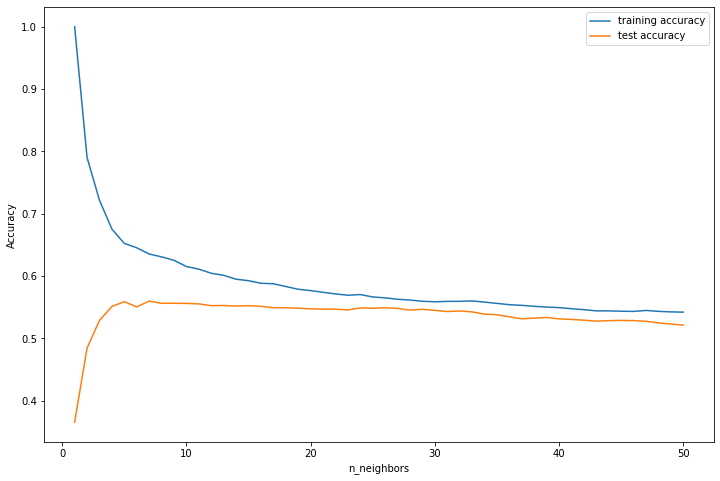

The optimal number of neighbors is 7


In [119]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

b)Developing a KNN algorithm based on the standardized data.

In [120]:
# making a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# fitting the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_STAND, y_train_STAND)



# predicting on new data
knn_stand_pred = knn_stand_fit.predict(x_test_STAND)



# Scoring the results
print('KNN Training Score:', knn_stand.score(x_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(x_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(x_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(x_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.6355
KNN Testing Score : 0.5599
KNN Train-Test Gap: 0.0756


 An output summary for each KNN model's performance.

In [121]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      14            {knn_opt_score_train}            {knn_opt_score_test}
Standardized          6             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", "NA", "NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             1.0              0.2333
Non-Standardized      14            0.6319            0.5368
Standardized          6             0.6355           0.5599



 # CARTs and Ensemble Models

## Part 1: Carts and ensemble models

Importing and intitializing the data

In [160]:
# importing critical libraries
import pandas            as pd                 # data science essentials
import matplotlib.pyplot as plt                # data visualization
import seaborn           as sns                # enhanced data viz


# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm


# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree                   # tree plots


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
new_chefdata.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_TASTES_AND_PREFERENCES
0,393.0,1,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,5.973810,0.0
1,1365.0,1,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,7.218910,0.0
2,800.0,1,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,6.684612,0.0
3,600.0,1,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,6.396930,0.0
4,1490.0,1,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,7.306531,-inf


In [171]:
# declaring sets of x-variables

# OLS significant variables
x_variables = ['TOTAL_MEALS_ORDERED','CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED'
               'PRODUCT_CATEGORIES_VIEWED','CANCELLATIONS_BEFORE_NOON','WEEKLY_PLAN','CROSS_SELL_SUCCESS'
               'AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME','MEDIAN_MEAL_RATING'
               'AVG_CLICKS_PER_VISIT']

# all X-variables
full_x = ['TOTAL_MEALS_ORDERED','CONTACTS_W_CUSTOMER_SERVICE','CANCELLATIONS_BEFORE_NOON','WEEKLY_PLAN','CROSS_SELL_SUCCESS',
          'AVG_TIME_PER_SITE_VISIT','TASTES_AND_PREFERENCES','AVG_PREP_VID_TIME','MEDIAN_MEAL_RATING',
          'AVG_CLICKS_PER_VISIT','CANCELLATIONS_AFTER_NOON','PC_LOGINS','LARGEST_ORDER_SIZE',
          'UNIQUE_MEALS_PURCH','PACKAGE_LOCKER','REFRIGERATED_LOCKER']


# lasso significant variables
reduced_x = ['TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE', 'WEEKLY_PLAN',
             'CROSS_SELL_SUCCESS', 'TASTES_AND_PREFERENCES', 'AVG_TIME_PER_SITE_VISIT',
             'MEDIAN_MEAL_RATING', 'UNIQUE_MEALS_PURCH','LARGEST_ORDER_SIZE'
             'PRODUCT_CATEGORIES_VIEWED','AVG_CLICKS_PER_VISIT']
            

In [172]:
# preparing x-variables
#x_data = housing.loc[ : , reduced_x ]  # lasso x-variables
x_data = new_chefdata.loc[ : , full_x]      # full x-variables
#x_data = housing.loc[ : , x_variables] # ols x-variables


# preparing y-variable
y_data = new_chefdata.loc[ : , 'REVENUE']    # y-variable 
#y_data = housing.loc[ : , 'logSale_Price'] # y-variable

a) Preparing train-test split

In [173]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219)

In [174]:
print(f"""
X-Train: {x_train.shape}
Y-Train: {y_train.shape}

""")


X-Train: (1459, 16)
Y-Train: (1459,)




## Classification Trees (CART Models)

Cart Models good in regression problems as they result in very important tools such as tree plots and feature importance. As they are a nonparametric model types, and they have no coefficients. They also have no model form, meaning that we do not need to change features or construct new ones. 

Cart Model Highlights
   - overfitting until pruned
   - can be worse at prediction than other models (after pruning)
   - can result in very good output which is used in hypothesis and data-driven findings

 loading a user-defined function for CART model output.

In [175]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

Developing a regression tree model. it overfits to the training data as it can grow futher

In [176]:
model_name = 'Unpruned Regression Tree'

# making a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor()


# fitting to the training data
model_fit = model.fit(x_train, y_train)


# predicting on new data
model_pred = model.predict(x_test)


# Scoring the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 1.0
Testing Score  : 0.5974
Train-Test Gap : 0.4026


a) Developing a regression tree with a maximum depth of 4 and a minimum number of samples per leaf of 25.

In [177]:
model_name = 'Pruned Regression Tree'

# making a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth        = 4,
                              min_samples_leaf = 40,
                              random_state     = 219)


# fitting to the training data
model_fit = model.fit(x_train, y_train)


# predicting on new data
model_pred = model.predict(x_test)


# scoring the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6505
Testing Score  : 0.6694
Train-Test Gap : 0.0189


In [178]:
model_name = 'Pruned Regression Tree'

# making the model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth        = 4,
                              min_samples_leaf = 25,
                              random_state     = 219)


# fitting to the training data
model_fit = model.fit(x_train, y_train)


# predictng on new data
model_pred = model.predict(x_test)


# scoring the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6984
Testing Score  : 0.676
Train-Test Gap : 0.0224


In [179]:
model_name = 'Pruned Regression Tree'

# making a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth        = 100,
                              min_samples_leaf = 200,
                              random_state     = 219)


# fitting to the training data
model_fit = model.fit(x_train, y_train)


# predicting on the new data
model_pred = model.predict(x_test)


# Scoring the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.5053
Testing Score  : 0.5607
Train-Test Gap : 0.0554


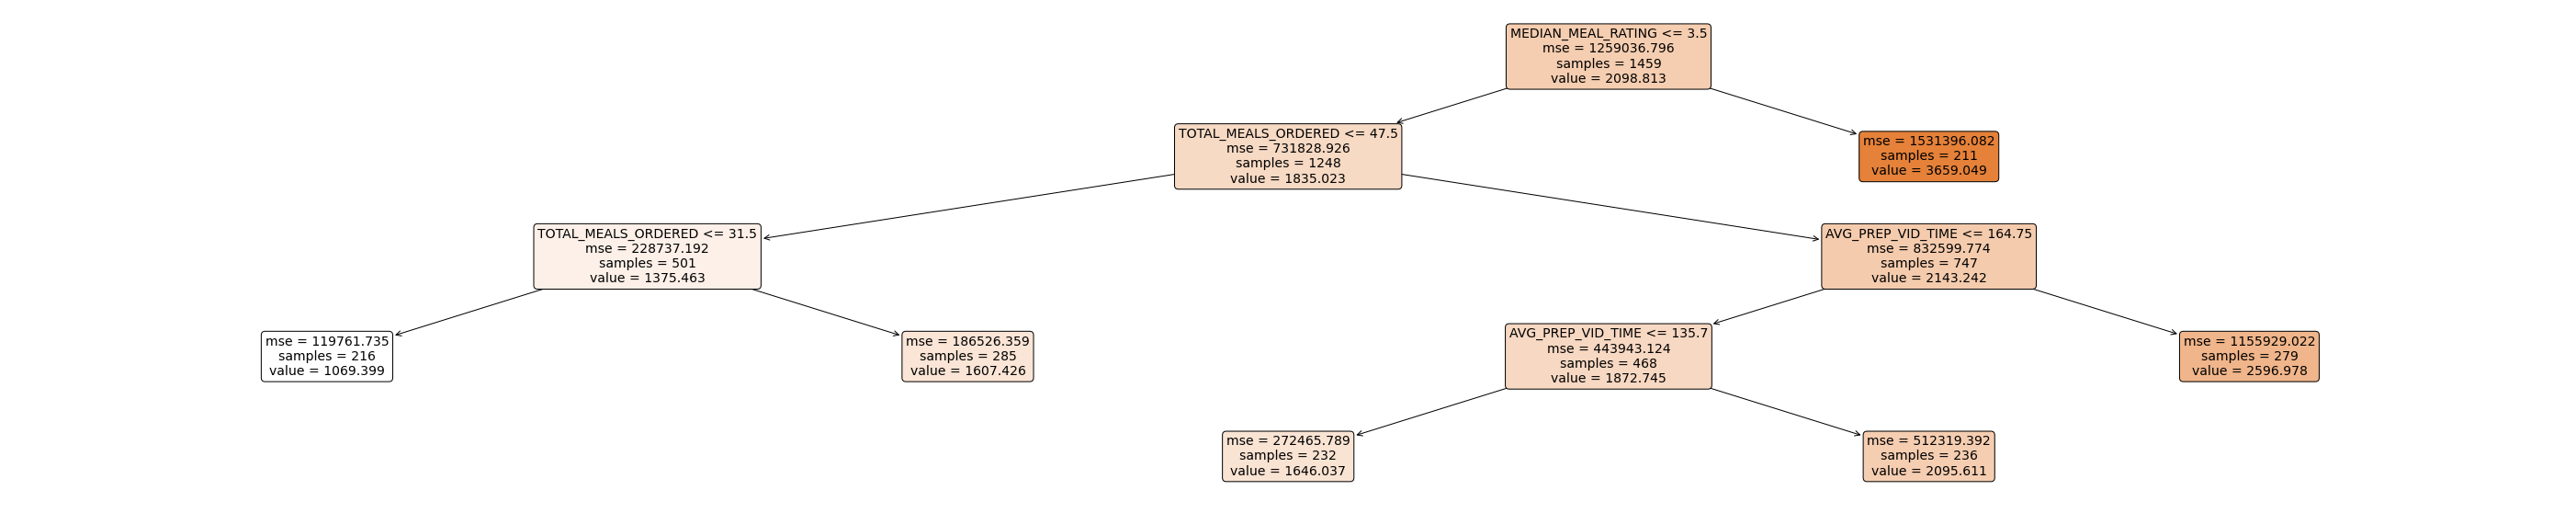

In [180]:
# setting figure size
plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

By which diminishing between different performance of variables and measuring the distance which is their performance between them cart models are considered

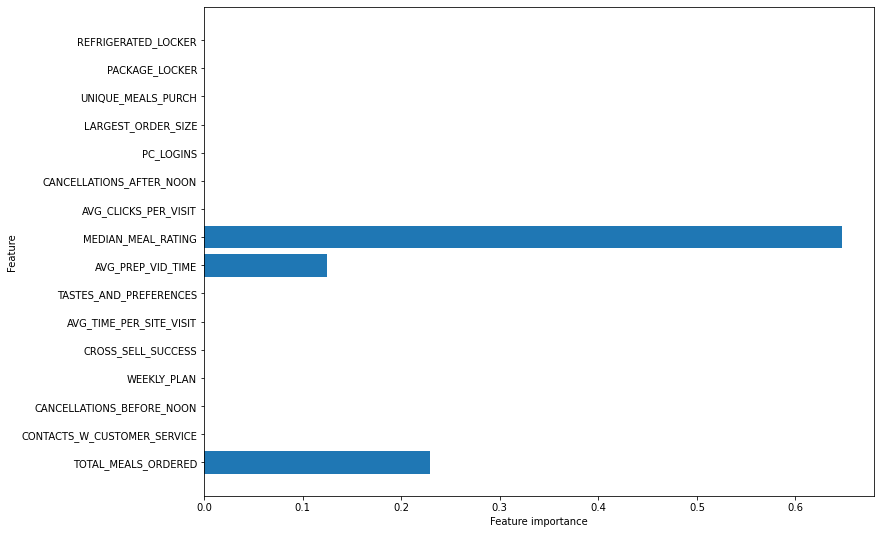

In [181]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

## Random Forest

A random forest is a group of decision trees that are slightly different from each other. this model starts by choosing random explanatory variables and building decision tree.

for example, one observation had 80% which occured at that time and another 20% which did not happen at that time how to find the predictions and the most votes ?


a) Building Random forest

In [182]:
# specifying a model name
model_name = 'Unpruned Decision Tree'


# making a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                                    criterion        = "mae",
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [183]:
# making the training data
model_fit = model.fit(x_train, y_train)


# predicting based on the testing set
model_pred = model.predict(x_test)


# scoring the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.9681
Testing Score  : 0.8066
Train-Test Gap : 0.1615


Tuned Random Forest

In [184]:
# specifying a model name
model_name = 'Pruned Decision Tree'


# making a random forest model with default values
model = RandomForestRegressor( n_estimators     = 100,
                               criterion        = 'mse',
                               max_depth        = 4,
                               min_samples_leaf = 25,
                               bootstrap        = True,
                               warm_start       = False,
                               random_state     = 219)


# fitt the training data
model_fit = model.fit(x_train, y_train)


# Predicting based on the testing set
model_pred = model.predict(x_test)


# Scoring the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7142
Testing Score  : 0.7247
Train-Test Gap : 0.0105


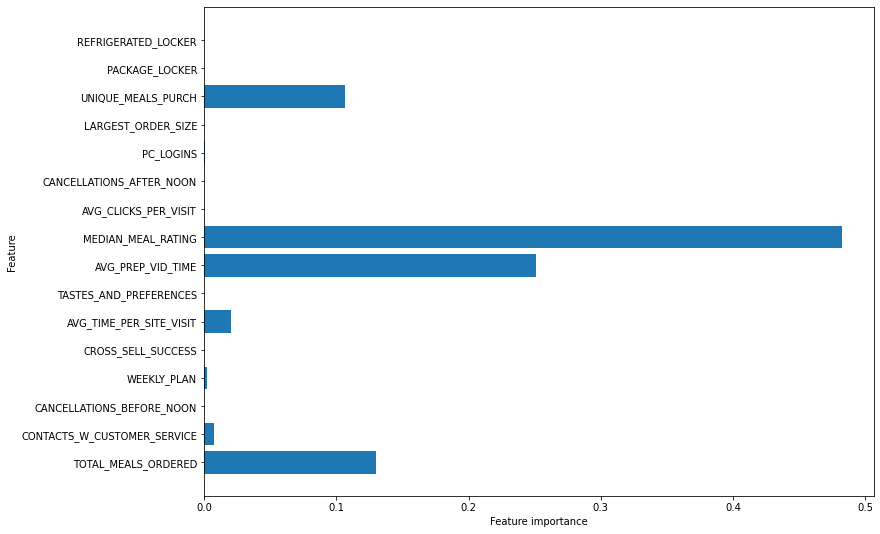

In [185]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

## Gradient Boosted Machines

Gradient boosted machines are as decision trees but intead of starting fresh with each change the learn from previous results of previous changes, not like random forest they use row wise penalty instead of column wise penalty by reweighting each column.

In [186]:
# INSTANTIATING the model object without hyperparameters
model = GradientBoostingRegressor(loss          = 'ls',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8853
Testing Score  : 0.8184
Train-Test Gap : 0.0669


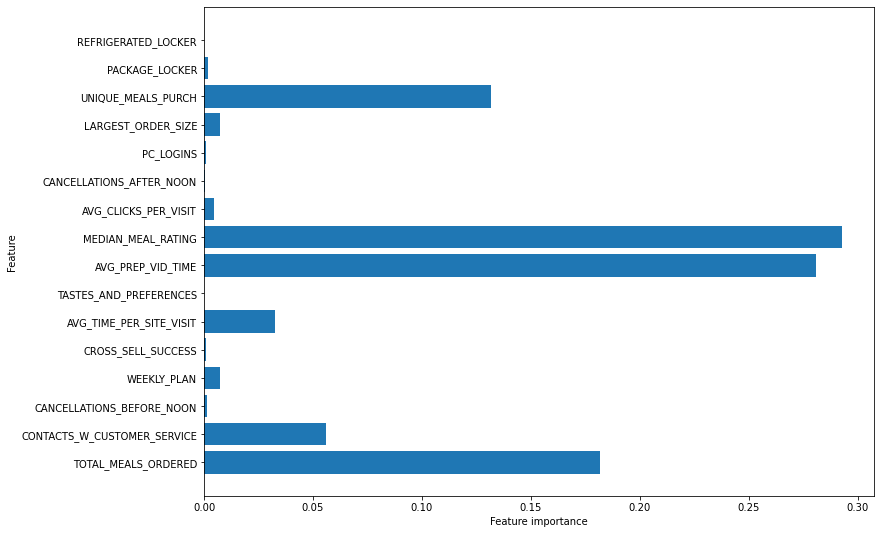

In [187]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

Thank you

- GBM had the highest Train-Test gap.
- In the unpruned in random forest it was very high.
- The KNN test gap was in the normal range no significant difference.
- Most of the ranges in the regression models were between 0.6 but it made a difference in the Training test gap
- by which this means the least Test - gap which was with no high iteration the ARD Model

